# Real-Time Weather Data Analysis for Hanoi and Ho Chi Minh City

This notebook performs real-time weather analysis for Hanoi and Ho Chi Minh City based on the data stored in the `weatherreport` table in Cassandra. We will retrieve, analyze, and visualize key weather parameters such as temperature, humidity, wind speed, and pressure.

## 1. Setup and Import Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from cassandrautils import getDF  # Assuming getDF is a utility function to fetch data from Cassandra

# Set Seaborn style for plotting
sns.set(style="whitegrid")

# Retrieve the weather data for Hanoi and Ho Chi Minh City from Cassandra
cities = ['Hanoi', 'Ho Chi Minh City']
df = getDF('weatherreport')

# Filter the data to only include Hanoi and Ho Chi Minh City
df_cities = df[df['location'].isin(cities)]

# Display the first few rows of the dataframe
df_cities.head()

,location,forecastdate,description,feels_like,humidity,pressure,sunrise,sunset,temp,temp_max,temp_min,wind
0,Ho Chi Minh City,2024-11-29 10:58:31,heavy intensity rain,303.200012,65.0,1009.0,1732834522,1732876100,301.160004,301.160004,301.160004,1.54
1,Ho Chi Minh City,2024-11-29 10:59:01,heavy intensity rain,303.200012,65.0,1009.0,1732834522,1732876100,301.160004,301.160004,301.160004,1.54
2,Ho Chi Minh City,2024-11-29 10:59:31,heavy intensity rain,303.200012,65.0,1009.0,1732834522,1732876100,301.160004,301.160004,301.160004,1.54
3,Ho Chi Minh City,2024-11-29 11:00:02,heavy intensity rain,303.200012,65.0,1009.0,1732834522,1732876100,301.160004,301.160004,301.160004,1.54
4,Ho Chi Minh City,2024-11-29 11:00:32,heavy intensity rain,303.200012,65.0,1009.0,1732834522,1732876100,301.160004,301.160004,301.160004,1.54


## 2. Descriptive Statistics and Data Overview

Let's first explore the dataset and check the basic statistics for key weather parameters like temperature, humidity, wind speed, and pressure.

In [2]:
# Get basic descriptive statistics for the numeric columns
df_cities.describe()

,forecastdate,feels_like,humidity,pressure,sunrise,sunset,temp,temp_max,temp_min,wind
count,88,88.000000,88.000000,88.000000,8.800000e+01,8.800000e+01,88.000000,88.000000,88.000000,88.000000
mean,2024-11-29 12:24:41.249999872,298.893073,53.568182,1014.250000,1.732835e+09,1.732876e+09,298.052840,298.052840,298.052840,2.592500
min,2024-11-29 10:58:31,293.429993,30.000000,1009.000000,1.732835e+09,1.732875e+09,294.149994,294.149994,294.149994,1.220000
25%,2024-11-29 11:04:01.249999872,293.429993,43.000000,1011.000000,1.732835e+09,1.732875e+09,294.149994,294.149994,294.149994,1.540000
50%,2024-11-29 13:01:37.500000,303.200012,65.000000,1011.000000,1.732835e+09,1.732876e+09,301.160004,301.160004,301.160004,2.060000
75%,2024-11-29 13:07:07.750000128,303.700012,69.000000,1019.000000,1.732836e+09,1.732876e+09,301.160004,301.160004,301.160004,4.380000
max,2024-11-29 13:12:42,303.700012,69.000000,1019.000000,1.732836e+09,1.732876e+09,301.160004,301.160004,301.160004,4.380000
std,NaN,4.816490,15.172416,4.139104,6.259057e+02,4.268224e+02,3.264009,3.264009,3.264009,1.257209


## 3. Real-Time Weather Visualization

Now, let's focus on visualizing real-time weather data for both cities. We'll analyze temperature, humidity, wind speed, and pressure. These visualizations will help us understand the trends over time for both cities.

### Temperature Over Time

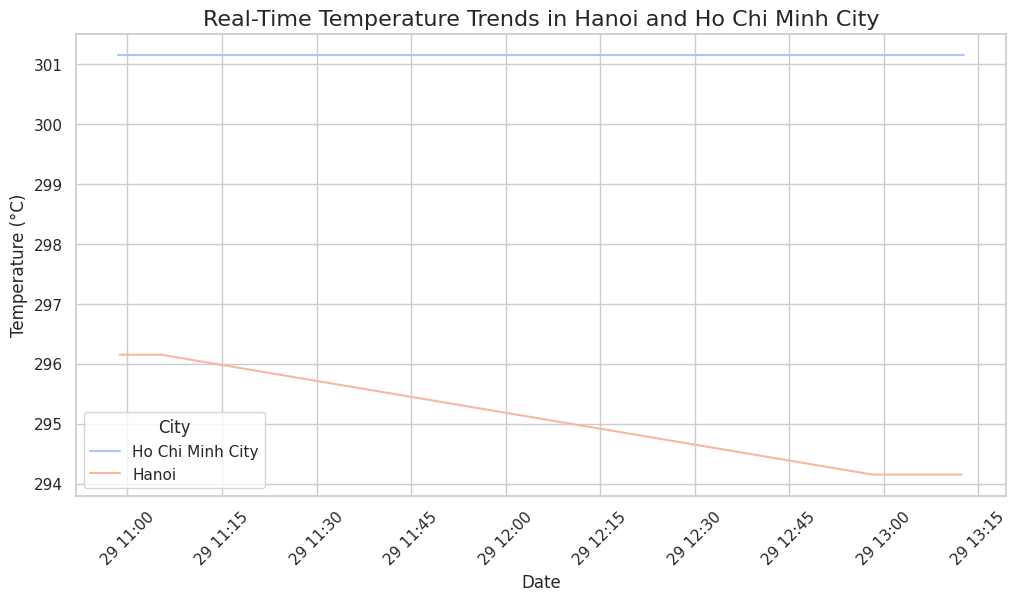

In [3]:
# Convert forecastdate to datetime if necessary
df_cities['forecastdate'] = pd.to_datetime(df_cities['forecastdate'])

# Plotting the temperature over time for both cities
plt.figure(figsize=(12, 6))
sns.lineplot(x='forecastdate', y='temp', data=df_cities, hue='location', palette='coolwarm')

# Customize the plot
plt.title('Real-Time Temperature Trends in Hanoi and Ho Chi Minh City', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='City')

# Show the plot
plt.show()

### Humidity Over Time

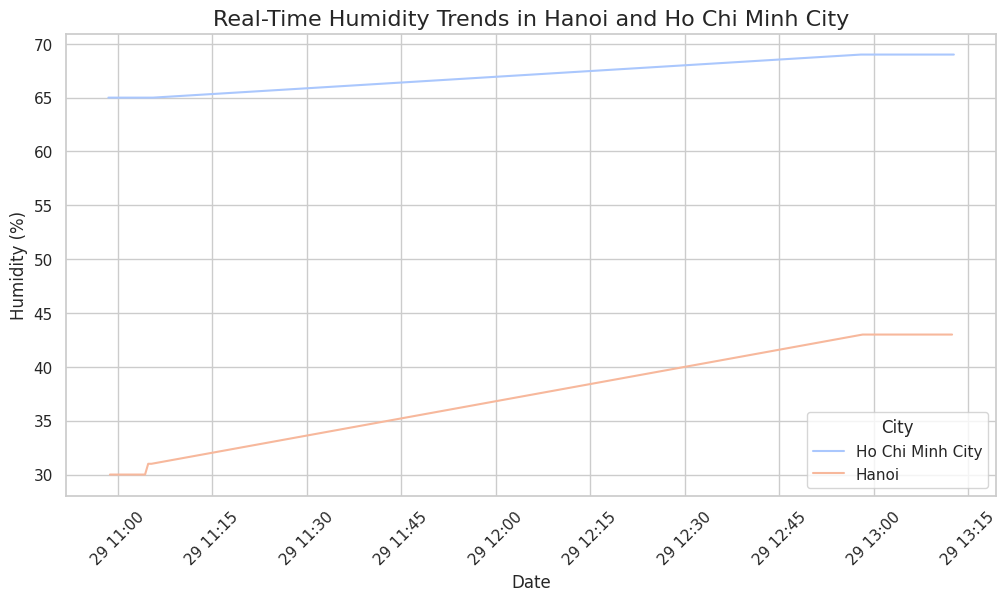

In [4]:
# Plotting the humidity over time for both cities
plt.figure(figsize=(12, 6))
sns.lineplot(x='forecastdate', y='humidity', data=df_cities, hue='location', palette='coolwarm')

# Customize the plot
plt.title('Real-Time Humidity Trends in Hanoi and Ho Chi Minh City', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Humidity (%)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='City')

# Show the plot
plt.show()

### Wind Speed Over Time

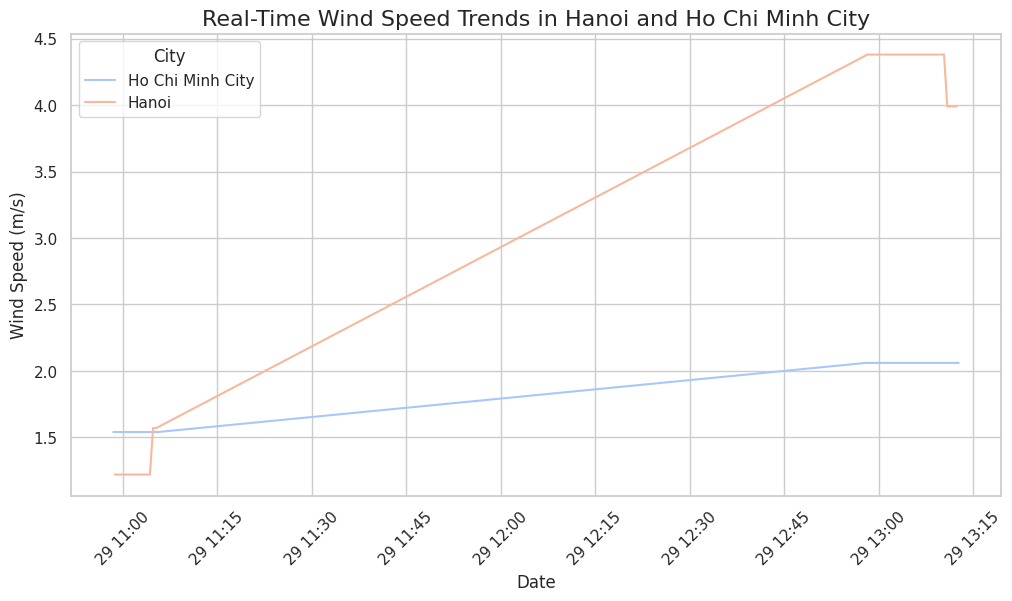

In [5]:
# Plotting the wind speed over time for both cities
plt.figure(figsize=(12, 6))
sns.lineplot(x='forecastdate', y='wind', data=df_cities, hue='location', palette='coolwarm')

# Customize the plot
plt.title('Real-Time Wind Speed Trends in Hanoi and Ho Chi Minh City', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Wind Speed (m/s)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='City')

# Show the plot
plt.show()

### Pressure Over Time

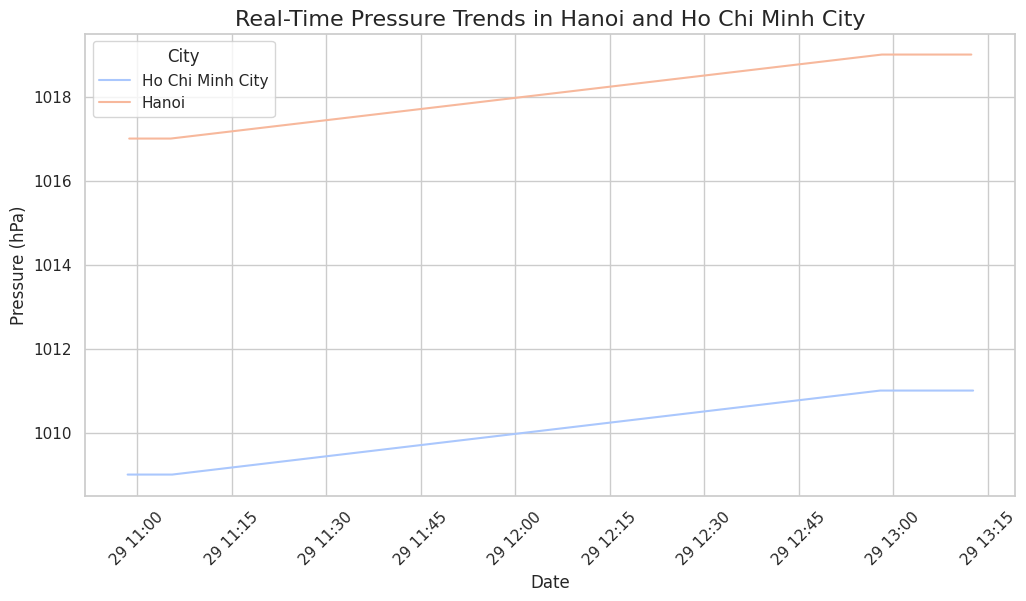

In [6]:
# Plotting the pressure over time for both cities
plt.figure(figsize=(12, 6))
sns.lineplot(x='forecastdate', y='pressure', data=df_cities, hue='location', palette='coolwarm')

# Customize the plot
plt.title('Real-Time Pressure Trends in Hanoi and Ho Chi Minh City', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Pressure (hPa)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='City')

# Show the plot
plt.show()